1)Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV. Apply the Logistic Regression to perform the following.

a. Calculate the coefficients (B0, B1 and B2).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error and B2 v/s error.

f. Use scikit learn model to repeat the above steps and compare the results.

Iteration    0 Cost:0.5963124834868424
Iteration 1000 Cost:0.01980506077217147
Iteration 2000 Cost:0.011079057794112652
Iteration 3000 Cost:0.007801692897107612
Iteration 4000 Cost:0.006052875447055142
Iteration 5000 Cost:0.004957499977404944
Iteration 6000 Cost:0.0042041275867719385
Iteration 7000 Cost:0.0036529723548097575
Iteration 8000 Cost:0.0032316358407240542
Iteration 9000 Cost:0.002898750113010146

 Updated parameters: w:[ 3.91220237 -6.12390888], b:-2.972146051946049

The prediction of 
[[ 2.781084  2.550537]
 [ 1.465489  2.362125]
 [ 3.396562  2.362125]
 [ 1.38807   1.85022 ]
 [ 3.064072  3.005306]
 [ 7.627531  2.759262]
 [ 5.332441  2.088627]
 [ 6.922597  1.771064]
 [ 8.675419 -0.24207 ]
 [ 7.673756  3.508563]] are 
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
The accuracy of the model is 1.0
sklearn coefficients :[[ 1.21740631 -0.16127466]],[-5.30180403]


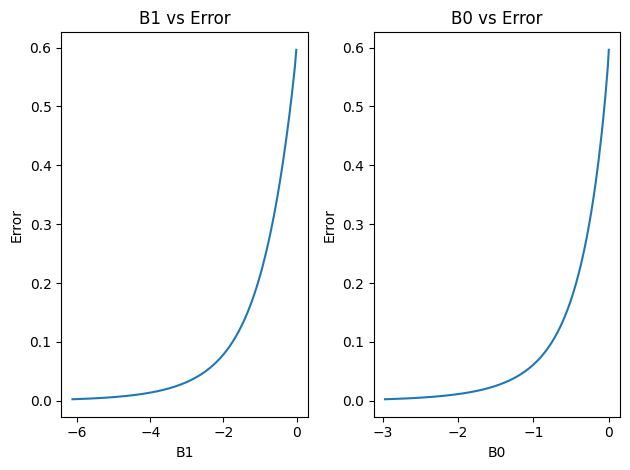

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data.csv')

x, y = df[['X1', 'X2']].values, df['Y'].values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = cost / m
    return cost

def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * x[i, j]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, iters):
    j_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % np.ceil(iters / 10) == 0:
            j_hist.append(compute_cost(x, y, w, b))
            print(f"Iteration {i:4d} Cost:{j_hist[-1]}")
    return w, b, j_hist

w_tmp, b_tmp, alpha, iters = np.zeros(x.shape[1]), 0.0, 0.1, 10000
w_out, b_out, _ = gradient_descent(x, y, w_tmp, b_tmp, alpha, iters)
print(f"\n Updated parameters: w:{w_out}, b:{b_out}")

def predict(x,y,w,b):
    m = x.shape[0]
    pred = np.zeros(m)
    for i in range(m):
        sig = sigmoid(np.dot(x[i],w)+b)
        if sig < 0.5:
            pred[i] = 0
        else:
            pred[i] = 1
    return pred

y_pred = predict(x,y,w_out,b_out)
print(f"\nThe prediction of \n{x} are \n{y_pred}")

def accuracy(x,y,w,b):
    m = x.shape[0]
    num_correct = 0
    pred = np.zeros(m)
    for i in range(m):
        sig = sigmoid(np.dot(x[i],w)+b)
        if sig < 0.5:
            pred[i] = 0
            num_correct += 1
        else:
            pred[i] = 1
            num_correct += 1
    accuracy = num_correct/len(pred)
    return accuracy

accuracy = accuracy(x,y,w_out,b_out)
print(f"The accuracy of the model is {accuracy}")

def plot(x, y, w, b):
    b1_values, b0_values, errors = [], [], []
    for i in range(10000):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        error = compute_cost(x, y, w, b)
        b1_values.append(w[1])
        b0_values.append(b)
        errors.append(error)
    
    plt.subplot(1, 2, 1)
    plt.title('B1 vs Error')
    plt.plot(b1_values, errors)
    plt.xlabel('B1')
    plt.ylabel('Error')

    plt.subplot(1, 2, 2)
    plt.title('B0 vs Error')
    plt.plot(b0_values, errors)
    plt.xlabel('B0')
    plt.ylabel('Error')
    plt.tight_layout()

plot(x,y,w_tmp,b_tmp)


clf = LogisticRegression(random_state=0).fit(x,y)
print(f"sklearn coefficients :{clf.coef_},{clf.intercept_}")

2) Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV. Applying Logistic Regression, explore the relationship between independent and dependent variables.

a. Calculate the coefficients (B0, and B1).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error.

f. Visualize the following binary cross entropy function for logistic regression using the above training data Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in Y-axis.

g. Use scikit learn model to repeat the above steps and compare the results

Iteration    0 Cost:0.6007179812224619
Iteration 1000 Cost:0.08726349238054493
Iteration 2000 Cost:0.05399321917120423
Iteration 3000 Cost:0.04025638393933364
Iteration 4000 Cost:0.03242109327257473
Iteration 5000 Cost:0.027266530226084405
Iteration 6000 Cost:0.023586215118344547
Iteration 7000 Cost:0.020813523309983123
Iteration 8000 Cost:0.018643233601989488
Iteration 9000 Cost:0.016894944807618103

 Updated parameters: w:[2.88290807], b:-12.5659123210753

The prediction of 
[[2.781084]
 [1.465489]
 [3.396562]
 [1.38807 ]
 [3.064072]
 [7.627531]
 [5.332441]
 [6.922597]
 [8.675419]
 [7.673756]] are 
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
The accuracy of the model is 1.0
sklearn coefficients :[[1.22553095]],[-5.72049426]


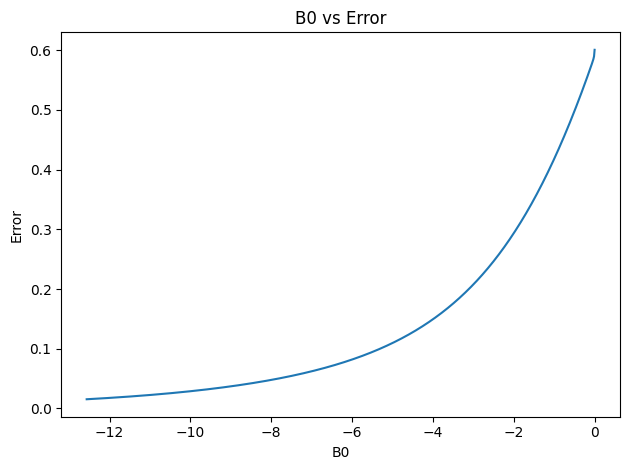

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data.csv')

x, y = df[['X1']].values, df['Y'].values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = cost / m
    return cost

def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * x[i, j]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, iters):
    j_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % np.ceil(iters / 10) == 0:
            j_hist.append(compute_cost(x, y, w, b))
            print(f"Iteration {i:4d} Cost:{j_hist[-1]}")
    return w, b, j_hist

w_tmp, b_tmp, alpha, iters = np.zeros(x.shape[1]), 0.0, 0.1, 10000
w_out, b_out, _ = gradient_descent(x, y, w_tmp, b_tmp, alpha, iters)
print(f"\n Updated parameters: w:{w_out}, b:{b_out}")

def predict(x, y, w, b):
    m = x.shape[0]
    pred = np.zeros(m)
    for i in range(m):
        sig = sigmoid(np.dot(x[i], w) + b)
        if sig < 0.5:
            pred[i] = 0
        else:
            pred[i] = 1
    return pred

y_pred = predict(x, y, w_out, b_out)
print(f"\nThe prediction of \n{x} are \n{y_pred}")

def accuracy(x, y, w, b):
    m = x.shape[0]
    num_correct = 0
    pred = np.zeros(m)
    for i in range(m):
        sig = sigmoid(np.dot(x[i], w) + b)
        if sig < 0.5:
            pred[i] = 0
            num_correct += 1
        else:
            pred[i] = 1
            num_correct += 1
    accuracy = num_correct / len(pred)
    return accuracy

accuracy = accuracy(x, y, w_out, b_out)
print(f"The accuracy of the model is {accuracy}")

def plot(x, y, w, b):
    b0_values, errors = [], []
    for i in range(10000):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        error = compute_cost(x, y, w, b)
        b0_values.append(b)
        errors.append(error)
    
    plt.title('B0 vs Error')
    plt.plot(b0_values, errors)
    plt.xlabel('B0')
    plt.ylabel('Error')
    plt.tight_layout()

plot(x, y, w_tmp, b_tmp)
clf = LogisticRegression(random_state=0).fit(x,y)
print(f"sklearn coefficients :{clf.coef_},{clf.intercept_}")

3) Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV. Apply the Logistic Regression with SGD to perform the following.
a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error for 50 iterations of 5 epochs.

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).

f. Use scikit learn model to repeat the above steps and compare the results.

Epoch 1, Iteration    1 Cost: 0.5963124834868424
Epoch 1, Iteration    6 Cost: 0.4824617049112968
Epoch 1, Iteration   11 Cost: 0.40833286208586533
Epoch 1, Iteration   16 Cost: 0.3551874282260391
Epoch 1, Iteration   21 Cost: 0.3149674160159644
Epoch 1, Iteration   26 Cost: 0.28335007027100767
Epoch 1, Iteration   31 Cost: 0.2577942306683191
Epoch 1, Iteration   36 Cost: 0.23669084605107837
Epoch 1, Iteration   41 Cost: 0.21896232165902463
Epoch 1, Iteration   46 Cost: 0.20385578567133558
Epoch 2, Iteration    1 Cost: 0.19082769075377282
Epoch 2, Iteration    6 Cost: 0.17947516192744076
Epoch 2, Iteration   11 Cost: 0.16949303810199787
Epoch 2, Iteration   16 Cost: 0.16064588663577745
Epoch 2, Iteration   21 Cost: 0.15274916697974866
Epoch 2, Iteration   26 Cost: 0.14565620476283198
Epoch 2, Iteration   31 Cost: 0.1392489755161135
Epoch 2, Iteration   36 Cost: 0.1334314540027702
Epoch 2, Iteration   41 Cost: 0.1281247313832366
Epoch 2, Iteration   46 Cost: 0.12326337499305684
Epoch 3,

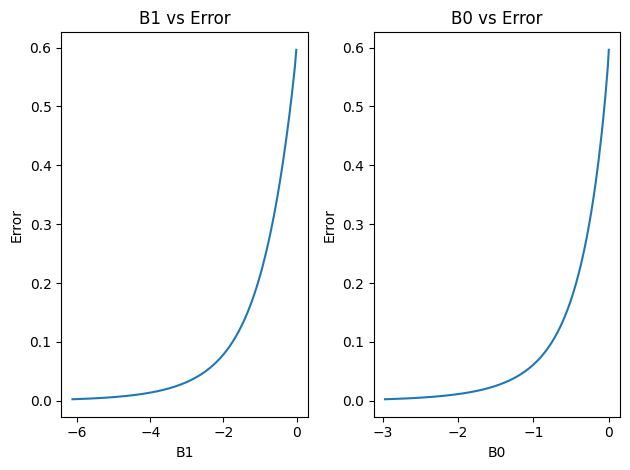

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

df = pd.read_csv('data.csv')

x, y = df[['X1', 'X2']].values, df['Y'].values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = cost / m
    return cost

def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * x[i, j]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, iterations, epochs):
    j_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for epoch in range(epochs):
        for i in range(iterations):
            dj_dw, dj_db = compute_gradient(x, y, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db
            if i % np.ceil(iterations / 10) == 0:
                j_hist.append(compute_cost(x, y, w, b))
                print(f"Epoch {epoch+1}, Iteration {i+1:4d} Cost: {j_hist[-1]}")
    return w, b, j_hist

iterations_per_epoch = 50  
epochs = 5  

w_tmp, b_tmp, alpha, total_iterations = np.zeros(x.shape[1]), 0.0, 0.1, 50 * iterations_per_epoch
w_out, b_out, _ = gradient_descent(x, y, w_tmp, b_tmp, alpha, iterations_per_epoch, epochs)
print(f"\n Updated parameters: w:{w_out}, b:{b_out}")

def predict(x,y,w,b):
    m = x.shape[0]
    pred = np.zeros(m)
    for i in range(m):
        sig = sigmoid(np.dot(x[i],w)+b)
        if sig < 0.5:
            pred[i] = 0
        else:
            pred[i] = 1
    return pred

y_pred = predict(x,y,w_out,b_out)
print(f"\nThe prediction of \n{x} are \n{y_pred}")

def accuracy(x,y,w,b):
    m = x.shape[0]
    num_correct = 0
    pred = np.zeros(m)
    for i in range(m):
        sig = sigmoid(np.dot(x[i],w)+b)
        if sig < 0.5:
            pred[i] = 0
            num_correct += 1
        else:
            pred[i] = 1
            num_correct += 1
    accuracy = num_correct/len(pred)
    return accuracy

accuracy = accuracy(x,y,w_out,b_out)
print(f"The accuracy of the model is {accuracy}")

def plot(x, y, w, b):
    b1_values, b0_values, errors = [], [], []
    for i in range(10000):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        error = compute_cost(x, y, w, b)
        b1_values.append(w[1])
        b0_values.append(b)
        errors.append(error)
    
    plt.subplot(1, 2, 1)
    plt.title('B1 vs Error')
    plt.plot(b1_values, errors)
    plt.xlabel('B1')
    plt.ylabel('Error')

    plt.subplot(1, 2, 2)
    plt.title('B0 vs Error')
    plt.plot(b0_values, errors)
    plt.xlabel('B0')
    plt.ylabel('Error')
    plt.tight_layout()

plot(x,y,w_tmp,b_tmp)


clf = LogisticRegression(random_state=0).fit(x,y)
print(f"sklearn coefficients :{clf.coef_},{clf.intercept_}")